In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logo-mariam/Screenshot 2023-03-16 182410.png
/kaggle/input/movies/movies.csv


## Eng/Mariam Ashraf

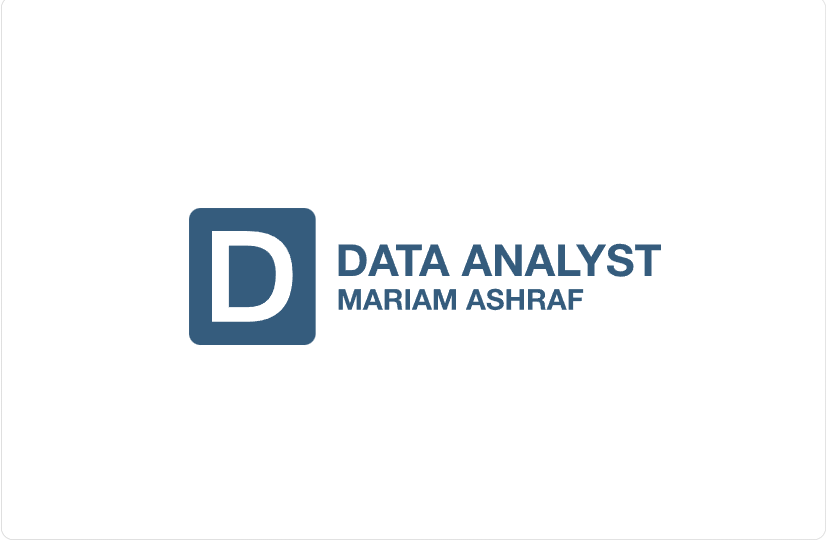

#  1- Clean data
#  2- Exploration Data
#  3-Visualization Data
#  4-Correlation between columns
#  5-Sure everything is good
# 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
import matplotlib
plt.style.use('ggplot')
from  matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [3]:
df=pd.read_csv('/kaggle/input/movies/movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# the name of columns 
df.keys()

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
#Describe data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [8]:
# we need ro see we have any missing data .
# Let's loop through the data and see of there are anything missing.
for col in df.columns:
    Look_missing =np.mean(df[col].isnull())
    print(f'{col}-{round(Look_missing*100)}%')
    
    

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Clean Data

In [10]:
# remove duplicate in columns
df.drop_duplicates(inplace=True)
#  remove missing values
df.dropna(inplace=True)

      

In [11]:
# sure that all values [missing,duplicate] remove
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [12]:
# to convert from float64 to int64
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

# What is the max budget & what film has the greatest budget?

In [14]:
df.keys()

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [15]:
df[df['budget']==df['budget'].max()]['name']

7445    Avengers: Endgame
Name: name, dtype: object

# What is the gener of film that has the greatest budget?

In [16]:
df[df['budget']==df['budget'].max()]['genre']

7445    Action
Name: genre, dtype: object

In [17]:
# What company did this film
df[df['budget']==df['budget'].max()]['company']

7445    Marvel Studios
Name: company, dtype: object

In [18]:
# When did this film do?
df[df['budget']==df['budget'].max()]['year']

7445    2019
Name: year, dtype: int64

In [19]:
# Every thing about the greatest film
for i in df.keys():
   x=df[df['budget']==df['budget'].max()][i]  
   print(f' The {i} : {x}')

 The name : 7445    Avengers: Endgame
Name: name, dtype: object
 The rating : 7445    PG-13
Name: rating, dtype: object
 The genre : 7445    Action
Name: genre, dtype: object
 The year : 7445    2019
Name: year, dtype: int64
 The released : 7445    April 26, 2019 (United States)
Name: released, dtype: object
 The score : 7445    8.4
Name: score, dtype: float64
 The votes : 7445    903000.0
Name: votes, dtype: float64
 The director : 7445    Anthony Russo
Name: director, dtype: object
 The writer : 7445    Christopher Markus
Name: writer, dtype: object
 The star : 7445    Robert Downey Jr.
Name: star, dtype: object
 The country : 7445    United States
Name: country, dtype: object
 The budget : 7445    356000000
Name: budget, dtype: int64
 The gross : 7445    2797501328
Name: gross, dtype: int64
 The company : 7445    Marvel Studios
Name: company, dtype: object
 The runtime : 7445    181.0
Name: runtime, dtype: float64


In [20]:
 # Every thing about the Worest film
for i in df.keys():
   x=df[df['budget']==df['budget'].min()][i]  
   print(f' The {i} : {x}')

 The name : 3318    Following
Name: name, dtype: object
 The rating : 3318    R
Name: rating, dtype: object
 The genre : 3318    Crime
Name: genre, dtype: object
 The year : 3318    1998
Name: year, dtype: int64
 The released : 3318    November 5, 1999 (United Kingdom)
Name: released, dtype: object
 The score : 3318    7.5
Name: score, dtype: float64
 The votes : 3318    89000.0
Name: votes, dtype: float64
 The director : 3318    Christopher Nolan
Name: director, dtype: object
 The writer : 3318    Christopher Nolan
Name: writer, dtype: object
 The star : 3318    Jeremy Theobald
Name: star, dtype: object
 The country : 3318    United Kingdom
Name: country, dtype: object
 The budget : 3318    6000
Name: budget, dtype: int64
 The gross : 3318    48482
Name: gross, dtype: int64
 The company : 3318    Next Wave Films
Name: company, dtype: object
 The runtime : 3318    69.0
Name: runtime, dtype: float64


# What is the most film take votes?

In [21]:
for i in df.keys():
   x=df[df['votes']==df['votes'].max()][i]  
   print(f' The {i} : {x}')


 The name : 2443    The Shawshank Redemption
5243             The Dark Knight
Name: name, dtype: object
 The rating : 2443        R
5243    PG-13
Name: rating, dtype: object
 The genre : 2443     Drama
5243    Action
Name: genre, dtype: object
 The year : 2443    1994
5243    2008
Name: year, dtype: int64
 The released : 2443    October 14, 1994 (United States)
5243       July 18, 2008 (United States)
Name: released, dtype: object
 The score : 2443    9.3
5243    9.0
Name: score, dtype: float64
 The votes : 2443    2400000.0
5243    2400000.0
Name: votes, dtype: float64
 The director : 2443       Frank Darabont
5243    Christopher Nolan
Name: director, dtype: object
 The writer : 2443      Stephen King
5243    Jonathan Nolan
Name: writer, dtype: object
 The star : 2443       Tim Robbins
5243    Christian Bale
Name: star, dtype: object
 The country : 2443    United States
5243    United States
Name: country, dtype: object
 The budget : 2443     25000000
5243    185000000
Name: budget, d

In [22]:
# the least film take votes
for i in df.keys():
   x=df[df['votes']==df['votes'].min()][i]  
   print(f' The {i} : {x}')


 The name : 7616    High on the Hog
Name: name, dtype: object
 The rating : 7616    R
Name: rating, dtype: object
 The genre : 7616    Action
Name: genre, dtype: object
 The year : 7616    2019
Name: year, dtype: int64
 The released : 7616    April 16, 2019 (United States)
Name: released, dtype: object
 The score : 7616    3.5
Name: score, dtype: float64
 The votes : 7616    195.0
Name: votes, dtype: float64
 The director : 7616    Tony Wash
Name: director, dtype: object
 The writer : 7616    Andy Golub
Name: writer, dtype: object
 The star : 7616    Sid Haig
Name: star, dtype: object
 The country : 7616    United States
Name: country, dtype: object
 The budget : 7616    1200000
Name: budget, dtype: int64
 The gross : 7616    45696
Name: gross, dtype: int64
 The company : 7616    Hicktown Entertainment
Name: company, dtype: object
 The runtime : 7616    85.0
Name: runtime, dtype: float64


What kind of film film?

In [23]:
df['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [24]:
# How many company make films?
df['company'].value_counts()

Universal Pictures                     330
Columbia Pictures                      302
Warner Bros.                           298
Paramount Pictures                     279
Twentieth Century Fox                  209
                                      ... 
Cinépix Film Properties (CFP)            1
Intermedia Films                         1
Dollface                                 1
Calimari Productions                     1
Beijing Diqi Yinxiang Entertainment      1
Name: company, Length: 1475, dtype: int64

# All count keys of data

In [25]:
Keys=df.keys()
for i in Keys:
    x=df[i].value_counts()
    print(f'the count : {i}')
    print( x.head())
    
       

the count : name
Hercules       3
The Thing      2
Godzilla       2
Crash          2
Fever Pitch    2
Name: name, dtype: int64
the count : rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Name: rating, dtype: int64
the count : genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Name: genre, dtype: int64
the count : year
2002    173
2009    171
2008    171
2005    170
2001    164
Name: year, dtype: int64
the count : released
August 26, 2016 (United States)      7
December 25, 2008 (United States)    7
January 25, 2002 (United States)     7
December 16, 1983 (United States)    7
October 19, 2007 (United States)     7
Name: released, dtype: int64
the count : score
6.4    264
6.6    261
6.2    254
6.5    243
6.7    229
Name: score, dtype: int64
the count : votes
15000.0    75
11000.0    72
14000.0    65
20000.0    64
19000.0    63
Name: votes, dtype: int64
the count : director
Woody Allen          3

In [26]:
# sort data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


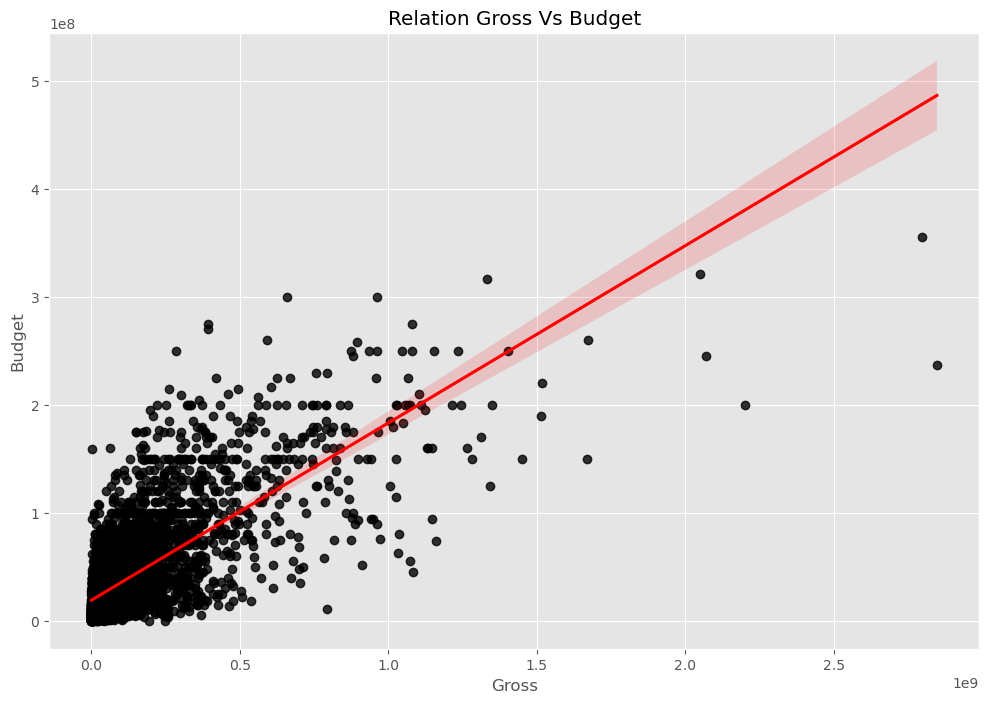

In [27]:
sns.regplot(x=df['gross'],y=df['budget'], data=df,scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.title('Relation Gross Vs Budget')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

In [28]:
# correlation
df.corr(method='pearson')#pearson , kendall , spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


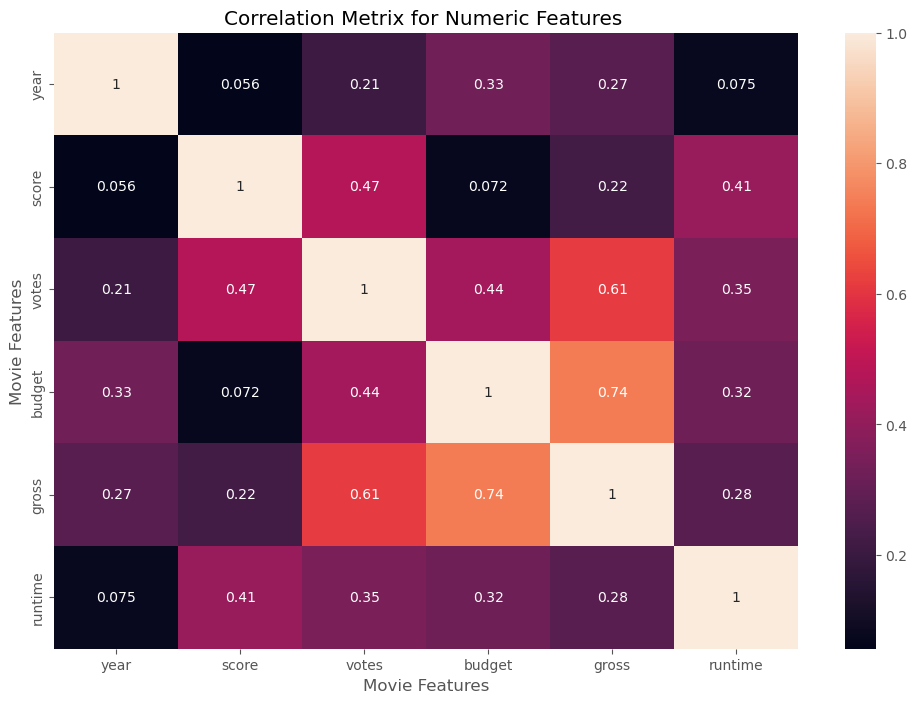

In [29]:
# High correlation between budget and gross
corr_metrix=df.corr(method='pearson')
sns.heatmap(corr_metrix , annot=True)
plt.title('Correlation Metrix for Numeric Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [30]:
df_numlized=df
for col_num in df_numlized.columns:
    if (df_numlized[col_num].dtype=='object'):
        df_numlized[col_num]=df_numlized[col_num].astype('category')
        df_numlized[col_num]=df_numlized[col_num].cat.codes
df_numlized    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


In [31]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


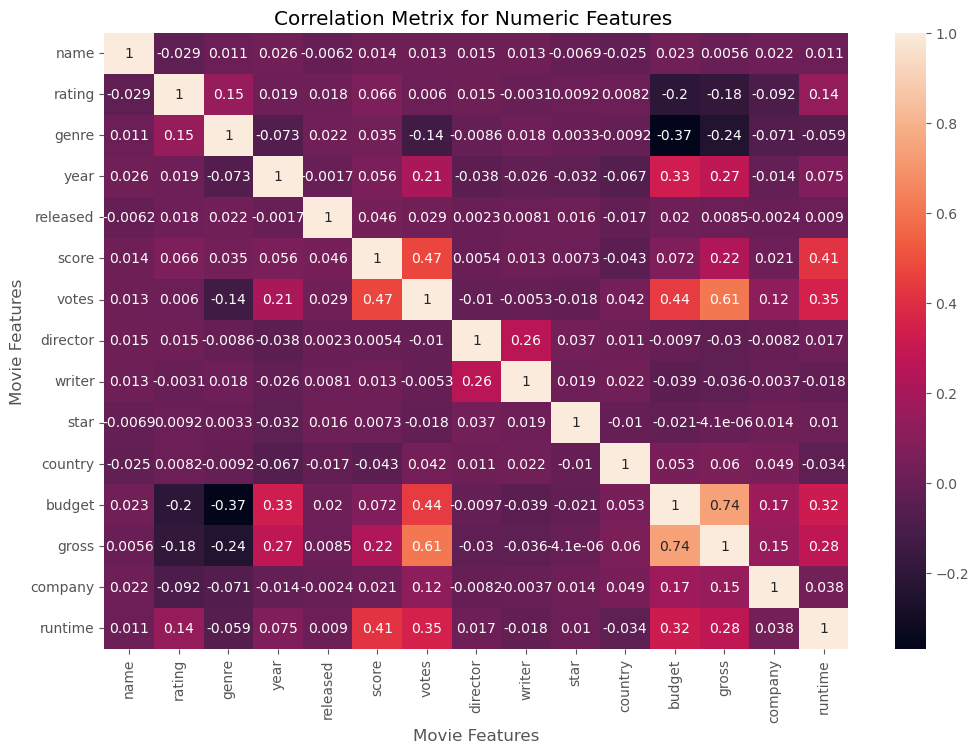

In [32]:
# correlation 
corr_metrix=df_numlized.corr(method='pearson')
sns.heatmap(corr_metrix , annot=True)
plt.title('Correlation Metrix for Numeric Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

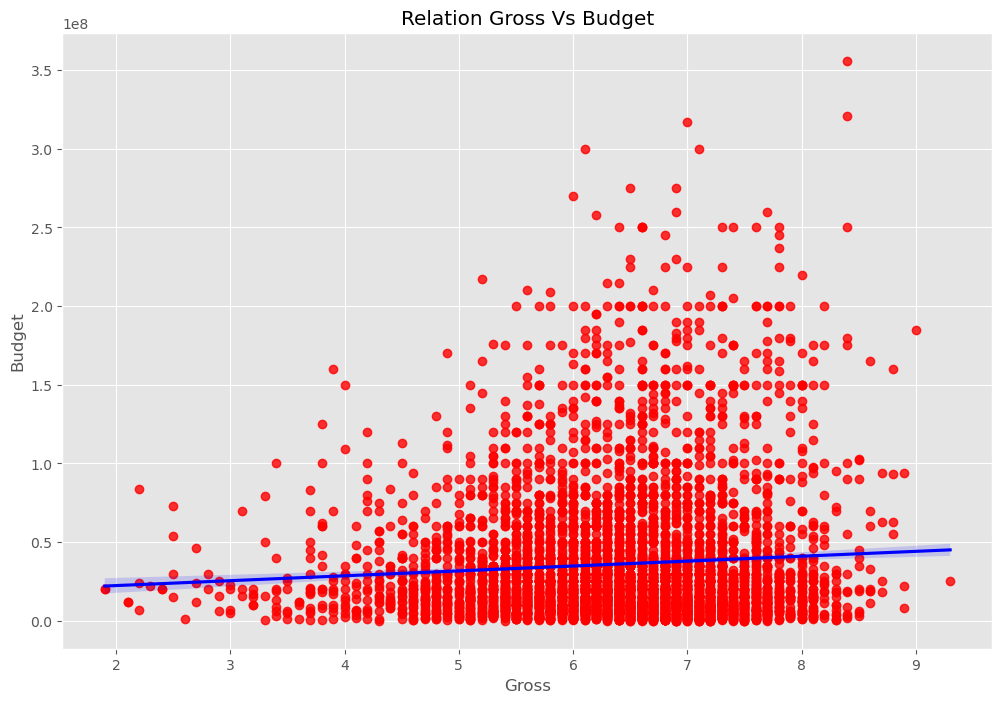

In [33]:
sns.regplot(x=df['score'],y=df['budget'], data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('Relation Gross Vs Budget')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

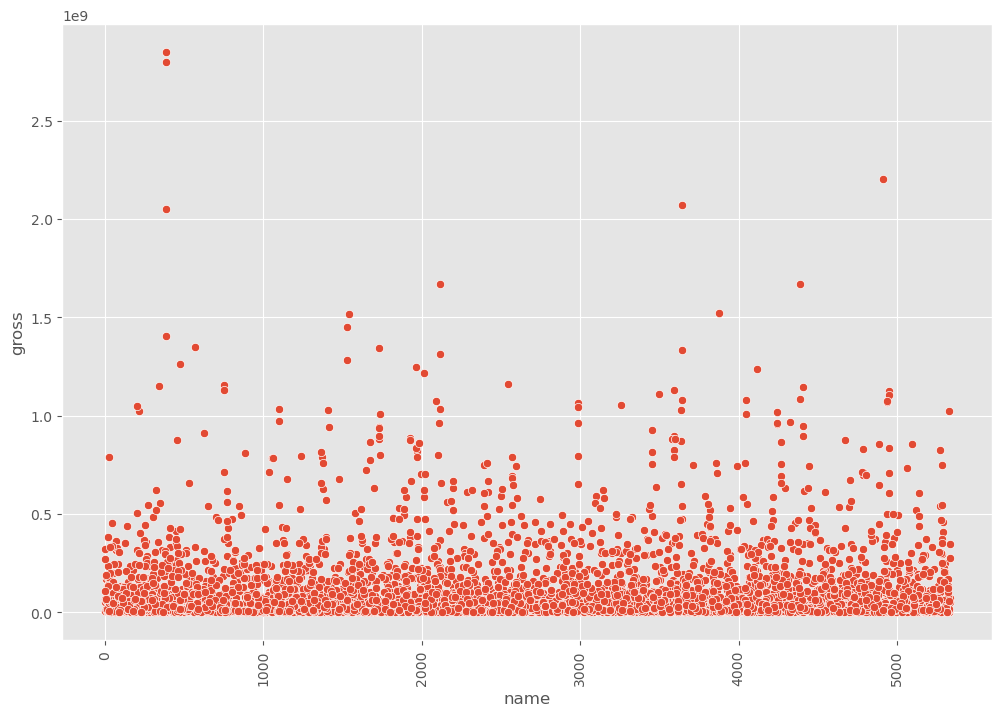

In [34]:
sns.scatterplot(x='name', y='gross', data=df)
plt.xticks(rotation=90) # rotate x-axis labels for better readability
plt.show()

# Correlation between Gross & Budget in year

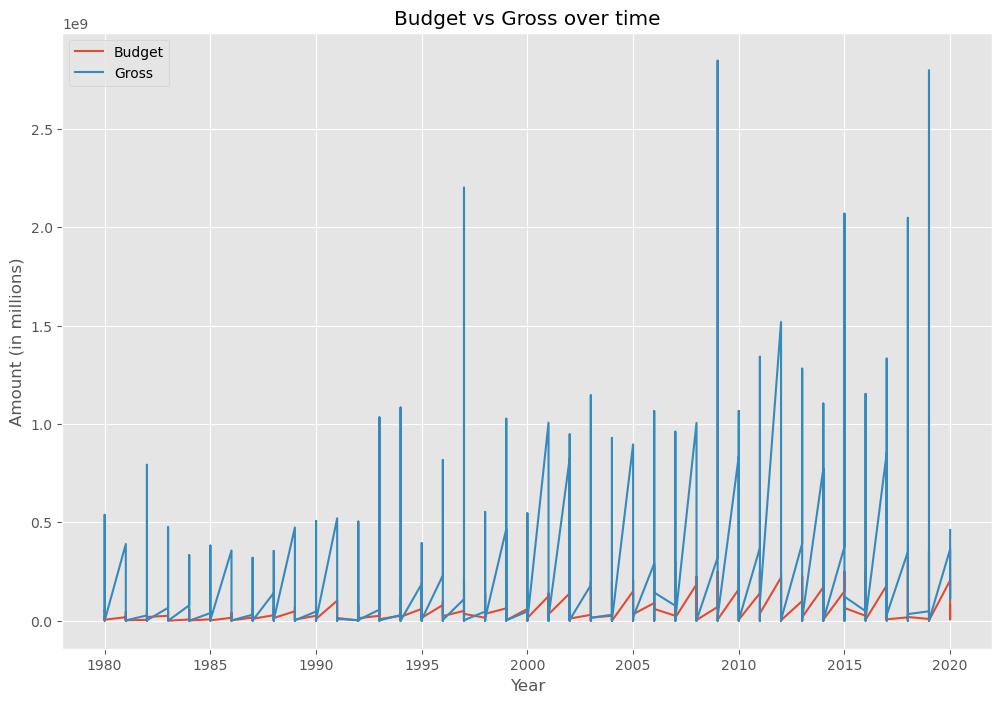

In [35]:
plt.plot(df['year'], df['budget'], label='Budget')
plt.plot(df['year'], df['gross'], label='Gross')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.title('Budget vs Gross over time')
plt.legend()
plt.show()

Corelation Gross & Year

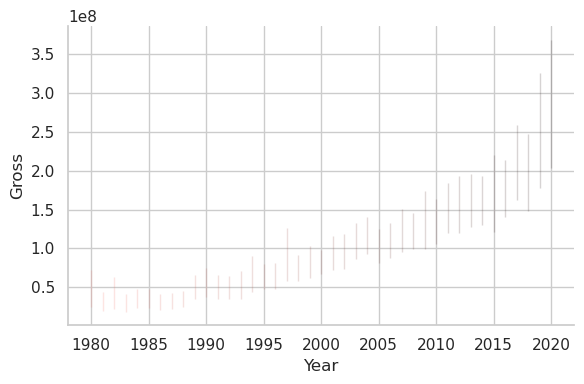

In [36]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="year", y="gross", hue="year",
    kind="line", palette="dark:salmon_r", linewidth=4, zorder=5,
    height=4, aspect=1.5, legend=False,color='black',
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

# Tweak the supporting aspects of the plot
g.set_titles("Gross & year")
g.set_axis_labels("Year", "Gross")
g.tight_layout()
